## Avaliação - Aula 8

In [ ]:
import math
import pymc3
import statistics
import numpy as np
import pandas as pd
from scipy import stats
from patsy import dmatrices
from scipy.stats import norm
from scipy.stats import beta
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Questão 6: Com o conjunto de dados do estudo do Prestígio das ocupações profissionais usados na aula da semana 7 e ajuste os modelos de regressão linear múltipla com as  variáveis explicativas especificadas (considerando  Prestige como a variável resposta). Ajuste os modelos padronizados com e depois sem intercepto (basta incluir −1 no modelo, junto com os preditores, na função usada em aulas passadas). Calcule o VIF de cada preditor com o comando:
                       statsmodels.stats.outliers_influence.variance_inflation_factor


In [2]:
# Dados
df = pd.read_csv("Prestigio.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
df = df.dropna()  #excluir linhas com  dados faltantes
df = df[["prestige","education","income"]]
df.head()  

,prestige,education,income
0,68.8,13.11,12351
1,69.1,12.26,25879
2,63.4,12.77,9271
3,56.8,11.42,8865
4,73.5,14.62,8403


##### 1. Education e Income


In [3]:
# Modelo de regressão com as variáveis explicativas education e income.
mod1 = ols('prestige ~ income + education',data=df)
res1 = mod1.fit()
print(res1.summary())

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige ~ income + education', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        13:09:07   Log-Likelihood:                -334.33
No. Observations:                  98   AIC:                             674.7
Df Residuals:                      95   BIC:                             682.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6210      3.116     -2.446      0.0

##### 2. Education e Income e respectiva interação

In [4]:
# Modelo de regressão com as variáveis explicativas education e income e a interação education x income.
mod2 = ols('prestige ~ income*education',data=df)  # colocano a interação income*education no moelo, 
#as váriaveis income e eucation
res2 = mod2.fit()
print(res2.summary()) 

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige ~ income*education', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)



                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        13:10:10   Log-Likelihood:                -331.07
No. Observations:                  98   AIC:                             670.1
Df Residuals:                      94   BIC:                             680.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -22.4323      6.558  

##### 3. Education e Income, ambas padronizadas

In [5]:
# Padronizando as variáveis (ver slide 6 a aula 8)
income_p = (df.income-np.mean(df.income))/np.sqrt(sum((df.income-np.mean(df.income))**2))
education_p = (df.education-np.mean(df.education))/np.sqrt(sum((df.education-np.mean(df.education))**2))
prestige_p = (df.prestige-np.mean(df.prestige))/np.sqrt(sum((df.prestige-np.mean(df.prestige))**2))

In [6]:
# Modelo de regressão com as variáveis explicativas education e income padronizadas.
mod3 = ols('prestige_p ~ income_p + education_p',data=df)
res3 = mod3.fit()
print(res3.summary())

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige_p ~ income_p + education_p', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:             prestige_p   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     207.9
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.00e-35
Time:                        13:12:06   Log-Likelihood:                 168.03
No. Observations:                  98   AIC:                            -330.1
Df Residuals:                      95   BIC:                            -322.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.679e-17      0.004   1.49e-14      

In [7]:
# Modelo de regressão com as variáveis explicativas education e income padronizadas (sem intercepto).
mod3_1 = ols('prestige_p ~ income_p + education_p -1',data=df)  # -1 é para a retirada do intercepto
res3_1 = mod3_1.fit()
print(res3_1.summary())

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige_p ~ income_p + education_p -1', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                                 OLS Regression Results                                
Dep. Variable:             prestige_p   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              210.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                    8.64e-36
Time:                        13:13:38   Log-Likelihood:                          168.03
No. Observations:                  98   AIC:                                     -332.1
Df Residuals:                      96   BIC:                                     -326.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##### 4. Education e Income, ambas padronizadas, e respectiva interação

In [8]:
# Modelo de regressão com as variáveis explicativas education e income padronizadas e a interação entre elas.
mod4 = ols('prestige_p ~ income_p*education_p',data=df) 
res4 = mod4.fit()
print(res4.summary())

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige_p ~ income_p*education_p', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                            OLS Regression Results                            
Dep. Variable:             prestige_p   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     148.8
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.43e-35
Time:                        13:14:29   Log-Likelihood:                 171.30
No. Observations:                  98   AIC:                            -334.6
Df Residuals:                      94   BIC:                            -324.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0074 

In [9]:
# Modelo de regressão com as variáveis explicativas education e income padronizadas e a interação entre elas (sem intercepto)

mod4_1 = ols('prestige_p ~ income_p*education_p -1',data=df)
res4_1 = mod4_1.fit()
print(res4_1.summary())

########Calculo do VIF (fator de inflação de variação)########
#Gerar uma matriz de experimento adequada para a regressão.
y, X = dmatrices('prestige_p ~ income_p*education_p -1', df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

                                 OLS Regression Results                                
Dep. Variable:             prestige_p   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              146.6
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                    1.62e-35
Time:                        13:15:13   Log-Likelihood:                          170.27
No. Observations:                  98   AIC:                                     -334.5
Df Residuals:                      95   BIC:                                     -326.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

##### Questão 7: Use o código dado para simular os dados que usamos do trabalho do Sildenafil e encontrar um estimador bayesiano da proporção, na população, de homens com pelo menos 60% de tentativas bem sucedidas.



In [10]:
import pymc3 

# Simula o conjunto de dados do Sildenafil
data = np.concatenate((np.repeat(1, 183),np.repeat(0,379-183)),axis=0)

# Cria o modelo com priori Beta(alpha,beta) e verossimilhança Bernoulli(p)
def creat_model_pymc3(data):
        with pymc3.Model() as model:
                p = pymc3.Beta('theta', alpha=1, beta=1)
                bernoulli = pymc3.Bernoulli('bernoulli', p=p, observed=data)
        return model
    
model = creat_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAP
map_estimate = pymc3.find_MAP(model=model)
map_estimate



logp = -262.7, ||grad|| = 6.5: 100%|█████████████| 6/6 [00:00<00:00, 18.62it/s]


{'theta_logodds__': array(-0.06862851), 'theta': array(0.4828496)}

#### (a) Se usarmos exatamente a mesma priori usada na vídeo aula (Beta(2,3), ao invés da Beta(1,1)), os estimadores MAP e EAP são iguais.

logp = -267.26, ||grad|| = 31.2: 100%|███████████| 6/6 [00:00<00:00, 90.84it/s]


{'theta_logodds__': array(-0.07333128), 'theta': array(0.48167539)}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|█████| 2000/2000 [01:14<00:00, 26.91it/s]


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.48  0.025   0.433    0.527      0.001    0.001     838.0   838.0   

       ess_bulk  ess_tail  r_hat  
theta     834.0    1139.0    1.0  


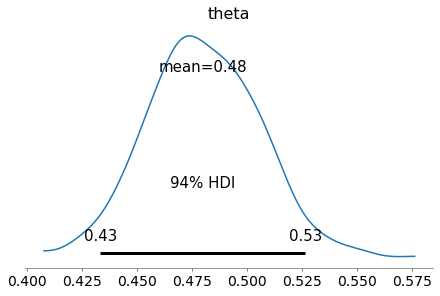

In [3]:
# Simula o conjunto de dados do Sildenafil
data = np.concatenate((np.repeat(1, 183),np.repeat(0,379-183)),axis=0)

# Cria o modelo com priori Beta(alpha,beta) e verossimilhança Bernoulli(p)
def creat_model_pymc3(data):
        with pymc3.Model() as model:
                p = pymc3.Beta('theta', alpha=2, beta=3)
                bernoulli = pymc3.Bernoulli('bernoulli', p=p, observed=data)
        return model
    
model = creat_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAP
map_estimate = pymc3.find_MAP(model=model)
print(map_estimate)

# Usa MCMC para simular observações da posteriori (método de cálculo da posteriori por simulação)
# o primeiro valor (1000) especifica o número de observações que serão geradas da função a posteriori 
# para a obtenção do estimador bayesiano; tune=1000 representa o número de observações descartadas
# para melhorar a aproximação da posteriori 
with model:
    trace = pymc3.sample(10000, tune=1000, cores=1)

# Resulta a média da posteriori (EAP), desvio padrão, intervalo de credibilidade HPD (intervalo e menos amplitude)....
summary=pymc3.summary(trace)
print(summary)

# Representa a posteriori, a média e o intervalo de credibilidade com menor amplitude, denotado por HPD (por simulação MCMC) 
pymc3.plot_posterior(trace);

In [4]:
# Como nesse caso temos priori conjugada, Beta(2,3) e verossimilhança Bernoulli(p), sabemos que a distribuição posteriori é 
# uma Beta(a+soma_xi,b+n-soma_xi). Assim, também é possível calcular a média da posteriori fazendo:

a = 2
b = 3
n = len(data)
soma_xi= data.sum()
posteriori = beta(a + soma_xi, b + n - soma_xi) 

print('Média:', posteriori.mean())

Média: 0.4817708333333333


##### Questão 8: Usando o código fornecido:

logp = -262.7, ||grad|| = 6.5: 100%|████████████| 6/6 [00:00<00:00, 101.62it/s]


{'theta_logodds__': array(-0.06862851), 'theta': array(0.4828496)}


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|█████| 2000/2000 [01:18<00:00, 25.47it/s]


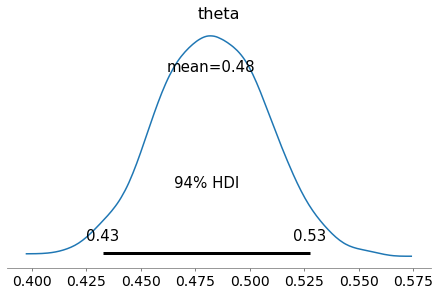

In [5]:
# Simula o conjunto de dados do Sildenafil
data = np.concatenate((np.repeat(1, 183),np.repeat(0,379-183)),axis=0)

# Cria o modelo com priori Beta(alpha,beta) e verossimilhança Bernoulli(p)
def creat_model_pymc3(data):
        with pymc3.Model() as model:
                p = pymc3.Beta('theta', alpha=1, beta=1)
                bernoulli = pymc3.Bernoulli('bernoulli', p=p, observed=data)
        return model
    
model = creat_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAP
map_estimate = pymc3.find_MAP(model=model)
print(map_estimate)

# Usa MCMC para gerar observações da posteriori (método de cálculo da posteriori por simulação)
with model:
    trace = pymc3.sample(1000, tune=1000, cores=1)   
    
# Faz o gráfico da posteriori, com sua média e o intervalo de credibilidade HPD
pymc3.plot_posterior(trace);


Se gerarmos poucas observações da posteriori simuladas por MCMC (10, por exemplo, ao invés
de 1000), os resultados ficam bem piores porque são baseados em um número muito pequeno de observações. Note que a forma da distribuição a posteriori é afetada por essa mudança.  Faça isso com a seguinte modificação:


logp = -262.7, ||grad|| = 6.5: 100%|█████████████| 6/6 [00:00<00:00, 86.90it/s]


{'theta_logodds__': array(-0.06862851), 'theta': array(0.4828496)}


Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|█████| 1010/1010 [00:45<00:00, 25.64it/s]
C:\Users\Mariana\Anaconda3\lib\site-packages\pymc3\sampling.py:496: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.481  0.028   0.452    0.549      0.005    0.004      26.0    26.0   

       ess_bulk  ess_tail  r_hat  
theta      16.0      26.0   1.25  


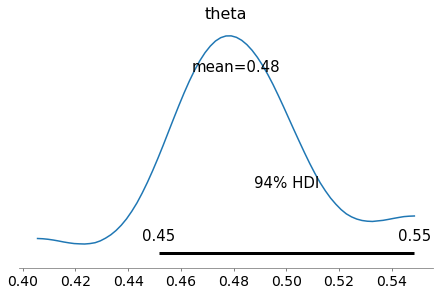

In [6]:
# Simula o conjunto de dados do Sildenafil
data = np.concatenate((np.repeat(1, 183),np.repeat(0,379-183)),axis=0)

# Cria o modelo com priori Beta(alpha,beta) e verossimilhança Bernoulli(p)
def creat_model_pymc3(data):
        with pymc3.Model() as model:
                p = pymc3.Beta('theta', alpha=1, beta=1)
                bernoulli = pymc3.Bernoulli('bernoulli', p=p, observed=data)
        return model
    
model = creat_model_pymc3(data)

# Estima a probabilidade de sucesso da Bernoulli por MAP
map_estimate = pymc3.find_MAP(model=model)
print(map_estimate)
import pymc3 

# Usa MCMC para gerar somente 10 observações da posteriori (método de cálculo da posteriori por simulação)
with model:
    trace = pymc3.sample(10, tune=1000, cores=1)
   
summary=pymc3.summary(trace)
print(summary)
    
# Faz o gráfico da posteriori, com  sua média e o intervalo de credibilidade
pymc3.plot_posterior(trace);

Uma forma alternativa de visualizar essa piora é fazendo o gráfico das observações obtidas após a exclusão das primeiras tune=1000 observações geradas. Use o comando a seguir:

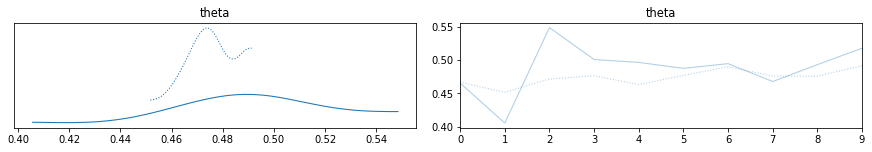

In [7]:
pymc3.traceplot(trace);